<a href="https://colab.research.google.com/github/golubovska71-afk/main/blob/main/%22final_project_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📖 Легенда

**Shop\&Joy** — быстрорастущий украинский интернет-магазин, который продаёт товары для дома, электронику и одежду.
Компания активно конкурирует на рынке среднего ценового сегмента и ориентируется на покупателей из крупных и средних городов.

С января по май 2025 года CEO компании заметил странную тенденцию:

* В одни дни продажи бьют рекорды.
* В другие — падают почти в два раза.

Маркетинг считает, что причина — в **конкурентах и колебаниях курса доллара**.
Логистика жалуется на **проблемы с поставщиками и складскими остатками**.
Коммерческий директор предполагает, что **продажи «тянут вниз» низкомаржинальные товары и «холодные» клиенты**.

CEO хочет понять, что на самом деле происходит, и принять конкретные решения, чтобы **сделать продажи стабильными и прибыльными**.

---

## 📂 Данные

**1. Продажи ([orders.parquet](https://github.com/cpython-projects/da_2603/blob/main/da_2603_final_project/orders.parquet))**


* ID заказа
* Имя клиента
* ID товара
* Дата заказа
* Количество
* Цена
* Скидка (%)
* Сумма заказа

**2. Продукты ([products.csv](https://github.com/cpython-projects/da_2603/blob/main/da_2603_final_project/products.csv))**

* product\_id
* Название товара
* Категория
* Цена (грн)
* Маржа (грн)
* Остаток на складе

**3. Пользователи и сессии ([sessions.db](https://github.com/cpython-projects/da_2603/blob/main/da_2603_final_project/sessions.db))**

**customers**

* id — идентификатор клиента
* name — имя клиента
* email — email клиента
* acquisition\_channel — канал привлечения
* created\_at — дата регистрации

**sessions**

* id — идентификатор сессии
* customer\_id — ID клиента
* session\_start — время начала сессии
* session\_end — время окончания сессии
* pages — количество просмотренных страниц
* device — устройство
* channel — канал визита
* converted — конверсия (1 — покупка, 0 — нет)

**4. Курс валют (API НБУ)**  
Пример:  
`https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=USD&date=20250115&json`

---

## 🔍 Ключевые вопросы от CEO

1. Как колебания курса доллара влияют на средний чек и количество заказов?
2. Какие категории товаров имеют высокую маржинальность, но продаются плохо?
3. Какие каналы привлечения приносят клиентов с высоким LTV?
4. Кого из клиентов стоит пригласить в программу лояльности?
5. Есть ли сезонность продаж за последние 2 года?

---

## 🎯 Цель проекта

* Объединить внутренние и внешние источники данных в единую систему анализа.
* Найти ключевые факторы, влияющие на продажи.
* Разработать рекомендации, как стабилизировать и увеличить выручку.

---

## 📦 Deliverables

1. **Jupyter Notebook**:

   * Загрузка и очистка всех источников данных.
   * EDA
   * Объединение данных в единую структуру.
   * Расчёт ключевых метрик.
   * Визуализация трендов и зависимостей.
   * Ответы на все 5 вопросов от CEO.
   * Обоснование выводов с цифрами и графиками.

2. **Презентация для CEO (Google Presentation)**:

   * Краткое описание задачи и источников данных.
   * Основные выводы в формате, понятном бизнесу.
   * 3–5 конкретных рекомендаций для увеличения продаж.
   * Потенциальный эффект от внедрения рекомендаций.

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving orders.parquet to orders.parquet


In [3]:
orders = pd.read_parquet("orders.parquet")
orders.head()

,ID заказа,Имя клиента,ID Товара,Дата заказа,Количество,Цена,Скидка (%),Сумма заказа
0,1,Клиент_156,172,2023-01-01,4,49714.23,0,198856.92
1,2,Клиент_337,403,2023-01-01,5,43939.34,25,164772.52
2,2,Клиент_337,207,2023-01-01,4,11374.47,0,45497.88
3,2,Клиент_337,326,2023-01-01,2,26728.47,25,40092.70
4,3,Клиент_432,171,2023-01-01,1,2224.02,0,2224.02


In [4]:
data = orders.to_dict(orient="records")
print(*data, sep="\n")

{'ID заказа': 1, 'Имя клиента': 'Клиент_156', 'ID Товара': 172, 'Дата заказа': '2023-01-01', 'Количество': '4', 'Цена': '49714.23', 'Скидка (%)': '0', 'Сумма заказа': 198856.92}
{'ID заказа': 2, 'Имя клиента': 'Клиент_337', 'ID Товара': 403, 'Дата заказа': '2023-01-01', 'Количество': '5', 'Цена': '43939.34', 'Скидка (%)': '25', 'Сумма заказа': 164772.52}
{'ID заказа': 2, 'Имя клиента': 'Клиент_337', 'ID Товара': 207, 'Дата заказа': '2023-01-01', 'Количество': '4', 'Цена': '11374.47', 'Скидка (%)': '0', 'Сумма заказа': 45497.88}
{'ID заказа': 2, 'Имя клиента': 'Клиент_337', 'ID Товара': 326, 'Дата заказа': '2023-01-01', 'Количество': '2', 'Цена': '26728.47', 'Скидка (%)': '25', 'Сумма заказа': 40092.7}
{'ID заказа': 3, 'Имя клиента': 'Клиент_432', 'ID Товара': 171, 'Дата заказа': '2023-01-01', 'Количество': '1', 'Цена': '2224.02', 'Скидка (%)': '0', 'Сумма заказа': 2224.02}
{'ID заказа': 4, 'Имя клиента': 'Клиент_432', 'ID Товара': 113, 'Дата заказа': '2023-01-01', 'Количество': '5', 'Ц

In [5]:
df_orders = pd.DataFrame(data)
df_orders

,ID заказа,Имя клиента,ID Товара,Дата заказа,Количество,Цена,Скидка (%),Сумма заказа
0,1,Клиент_156,172,2023-01-01,4,49714.23,0,198856.92
1,2,Клиент_337,403,2023-01-01,5,43939.34,25,164772.52
2,2,Клиент_337,207,2023-01-01,4,11374.47,0,45497.88
3,2,Клиент_337,326,2023-01-01,2,26728.47,25,40092.70
4,3,Клиент_432,171,2023-01-01,1,2224.02,0,2224.02
...,...,...,...,...,...,...,...,...
9411,4457,Клиент_363,488,2025-05-27,2,15955.92,25,23933.88
9412,4297,Клиент_195,149,2025-04-24,1,34712.96,15,29506.02
9413,3226,Клиент_194,127,2024-09-28,1,23849.49,10,21464.54
9414,2501,Клиент_181,411,2024-05-07,3,36140.53,0,108421.60


In [6]:
df_orders = df_orders.rename(columns={
    "ID заказа": "order_ID",
    "Имя клиента": "customer_Name",
    "ID Товара": "product_ID",
    "Дата заказа": "order_date",
    "Количество": "quantity",
    "Цена": "price",
    "Скидка (%)": "discount_percent",
    "Сумма заказа": "order_amount"
})

df_orders

,order_ID,customer_Name,product_ID,order_date,quantity,price,discount_percent,order_amount
0,1,Клиент_156,172,2023-01-01,4,49714.23,0,198856.92
1,2,Клиент_337,403,2023-01-01,5,43939.34,25,164772.52
2,2,Клиент_337,207,2023-01-01,4,11374.47,0,45497.88
3,2,Клиент_337,326,2023-01-01,2,26728.47,25,40092.70
4,3,Клиент_432,171,2023-01-01,1,2224.02,0,2224.02
...,...,...,...,...,...,...,...,...
9411,4457,Клиент_363,488,2025-05-27,2,15955.92,25,23933.88
9412,4297,Клиент_195,149,2025-04-24,1,34712.96,15,29506.02
9413,3226,Клиент_194,127,2024-09-28,1,23849.49,10,21464.54
9414,2501,Клиент_181,411,2024-05-07,3,36140.53,0,108421.60


In [7]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_ID          9416 non-null   int64  
 1   customer_Name     9416 non-null   object 
 2   product_ID        9416 non-null   int64  
 3   order_date        9416 non-null   object 
 4   quantity          9416 non-null   object 
 5   price             9416 non-null   object 
 6   discount_percent  9416 non-null   object 
 7   order_amount      9416 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 588.6+ KB


In [8]:
df_orders["order_date"] = pd.to_datetime(df_orders["order_date"], errors="coerce")

df_orders["discount_percent"] = df_orders["discount_percent"].astype(float)

In [9]:
df_orders = df_orders.drop_duplicates()
df_orders


,order_ID,customer_Name,product_ID,order_date,quantity,price,discount_percent,order_amount
0,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92
1,2,Клиент_337,403,2023-01-01,5,43939.34,25.0,164772.52
2,2,Клиент_337,207,2023-01-01,4,11374.47,0.0,45497.88
3,2,Клиент_337,326,2023-01-01,2,26728.47,25.0,40092.70
4,3,Клиент_432,171,2023-01-01,1,2224.02,0.0,2224.02
...,...,...,...,...,...,...,...,...
9370,1668,Клиент_364,474,2023-11-20,4,25266.87,5.0,96014.11
9383,2754,Клиент_410,343,2024-06-26,2,9057.75,0.0,18115.50
9397,890,Клиент_61,18,2023-06-19,3,31189.08,120.0,74853.79
9403,3179,Клиент_473,470,2024-09-19,пять,22974.4,0.0,68923.20


In [10]:
from google.colab import files
uploaded = files.upload()

Saving products.csv to products.csv


In [11]:
import csv
with open('products.csv') as file:
 reader = csv.DictReader(file)
 data = list(reader)

print(*data, sep = '\n')

{'product_id': '1', 'Название товара': 'Vitek Набор ножей 5707C', 'Категория': 'дом', 'Цена_грн': '19274.53', 'Маржа': '9484.43', 'Остаток': '142'}
{'product_id': '2', 'Название товара': 'Samsung Камера 4504C', 'Категория': 'электроника', 'Цена_грн': '2930.78', 'Маржа': '1457.07', 'Остаток': '30'}
{'product_id': '3', 'Название товара': 'Xiaomi Зеркало 7319C', 'Категория': 'дом', 'Цена_грн': '5954.12', 'Маржа': '2621.77', 'Остаток': '101'}
{'product_id': '4', 'Название товара': 'New Balance Рубашка 1810B', 'Категория': 'одежда', 'Цена_грн': '27232.34', 'Маржа': '10604.96', 'Остаток': '108'}
{'product_id': '5', 'Название товара': 'LG Смартфон 9464C', 'Категория': 'электроника', 'Цена_грн': '44610.08', 'Маржа': '20937.97', 'Остаток': '102'}
{'product_id': '6', 'Название товара': 'Columbia Пальто 2935D', 'Категория': 'одежда', 'Цена_грн': '9341.91', 'Маржа': '2986.79', 'Остаток': '163'}
{'product_id': '7', 'Название товара': 'Asus Смартфон 5004A', 'Категория': 'электроника', 'Цена_грн': '3

In [12]:
df_products = pd.DataFrame(data)
df_products


,product_id,Название товара,Категория,Цена_грн,Маржа,Остаток
0,1,Vitek Набор ножей 5707C,дом,19274.53,9484.43,142
1,2,Samsung Камера 4504C,электроника,2930.78,1457.07,30
2,3,Xiaomi Зеркало 7319C,дом,5954.12,2621.77,101
3,4,New Balance Рубашка 1810B,одежда,27232.34,10604.96,108
4,5,LG Смартфон 9464C,электроника,44610.08,20937.97,102
...,...,...,...,...,...,...
495,496,Zara Рубашка 9755C,одежда,36622.64,16827.12,58
496,497,Puma Кепка 3951B,одежда,22585.76,4127.57,74
497,498,Asus Смартфон 5530B,электроника,42298.58,6268.42,74
498,499,Huawei Планшет 52C,электроника,36166.42,7584.1,142


In [13]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_id       500 non-null    object
 1   Название товара  500 non-null    object
 2   Категория        500 non-null    object
 3   Цена_грн         500 non-null    object
 4   Маржа            500 non-null    object
 5   Остаток          500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [14]:
df_products = df_products.rename(columns={
    "product_id": "product_id",
    "Название товара": "product_name",
    "Категория": "category",
    "Цена_грн": "price_uah",
    "Маржа": "margin",
    "Остаток": "stock"
})

df_products

,product_id,product_name,category,price_uah,margin,stock
0,1,Vitek Набор ножей 5707C,дом,19274.53,9484.43,142
1,2,Samsung Камера 4504C,электроника,2930.78,1457.07,30
2,3,Xiaomi Зеркало 7319C,дом,5954.12,2621.77,101
3,4,New Balance Рубашка 1810B,одежда,27232.34,10604.96,108
4,5,LG Смартфон 9464C,электроника,44610.08,20937.97,102
...,...,...,...,...,...,...
495,496,Zara Рубашка 9755C,одежда,36622.64,16827.12,58
496,497,Puma Кепка 3951B,одежда,22585.76,4127.57,74
497,498,Asus Смартфон 5530B,электроника,42298.58,6268.42,74
498,499,Huawei Планшет 52C,электроника,36166.42,7584.1,142


In [15]:
df_products["product_id"] = pd.to_numeric(df_products["product_id"], errors="coerce").astype("Int64")
df_products["price_uah"] = pd.to_numeric(df_products["price_uah"], errors="coerce")
df_products["margin"] = pd.to_numeric(df_products["margin"], errors="coerce")
df_products["stock"] = pd.to_numeric(df_products["stock"], errors="coerce").astype("Int64")

df_products.dtypes

,0
product_id,Int64
product_name,object
category,object
price_uah,float64
margin,float64
stock,Int64


In [16]:
from google.colab import files
uploaded = files.upload()

Saving sessions.db to sessions.db


In [17]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sessions.db")

customers = pd.read_sql("SELECT * FROM customers;", conn)
sessions  = pd.read_sql("SELECT * FROM sessions;", conn)

conn.close()

df_sessions = sessions.merge(
    customers,
    left_on="customer_id",
    right_on="id",
    how="left",
    suffixes=("_session", "_customer")
)

df_sessions.head()


,id_session,customer_id,session_start,session_end,pages,device,channel,converted,id_customer,name,email,acquisition_channel,created_at
0,1,1,2025-01-15 18:30:00,2025-01-15 19:17:00,4,tablet,paid_search,0,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02 00:00:00
1,2,1,2025-06-06 20:28:00,2025-06-06 20:36:00,5,desktop,paid_search,0,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02 00:00:00
2,3,1,2023-09-21 17:44:00,2023-09-21 17:46:00,11,desktop,paid_search,0,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02 00:00:00
3,4,1,2024-11-25 09:35:00,2024-11-25 10:01:00,11,tablet,paid_search,0,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02 00:00:00
4,5,1,2024-08-22 16:09:00,2024-08-22 16:47:00,6,mobile,paid_search,0,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02 00:00:00


In [18]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30009 entries, 0 to 30008
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_session           30009 non-null  int64 
 1   customer_id          30009 non-null  int64 
 2   session_start        30009 non-null  object
 3   session_end          30009 non-null  object
 4   pages                30009 non-null  int64 
 5   device               30009 non-null  object
 6   channel              30009 non-null  object
 7   converted            30009 non-null  int64 
 8   id_customer          30009 non-null  int64 
 9   name                 30009 non-null  object
 10  email                30009 non-null  object
 11  acquisition_channel  30009 non-null  object
 12  created_at           30009 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.0+ MB


In [19]:
import pandas as pd

df_sessions["session_start"] = pd.to_datetime(df_sessions["session_start"])
df_sessions["session_end"]   = pd.to_datetime(df_sessions["session_end"])
df_sessions["created_at"]    = pd.to_datetime(df_sessions["created_at"])

df_sessions["id_session"]  = df_sessions["id_session"].astype("int32")
df_sessions["customer_id"] = df_sessions["customer_id"].astype("int32")
df_sessions["id_customer"] = df_sessions["id_customer"].astype("int32")

df_sessions["pages"]  = df_sessions["pages"].astype("int16")
df_sessions["converted"] = df_sessions["converted"].astype("bool")

text_cols = ["name", "email", "device", "channel", "acquisition_channel"]
df_sessions[text_cols] = df_sessions[text_cols].astype("string")

df_sessions


,id_session,customer_id,session_start,session_end,pages,device,channel,converted,id_customer,name,email,acquisition_channel,created_at
0,1,1,2025-01-15 18:30:00,2025-01-15 19:17:00,4,tablet,paid_search,False,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02
1,2,1,2025-06-06 20:28:00,2025-06-06 20:36:00,5,desktop,paid_search,False,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02
2,3,1,2023-09-21 17:44:00,2023-09-21 17:46:00,11,desktop,paid_search,False,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02
3,4,1,2024-11-25 09:35:00,2024-11-25 10:01:00,11,tablet,paid_search,False,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02
4,5,1,2024-08-22 16:09:00,2024-08-22 16:47:00,6,mobile,paid_search,False,1,Клиент_156,клиент_156@example.com,paid_search,2022-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30004,30005,16,2025-06-29 13:00:00,2025-06-29 13:18:00,3,mobile,organic,True,16,Клиент_416,клиент_416@example.com,organic,2022-11-26
30005,30006,84,2025-06-29 19:00:00,2025-06-29 19:16:00,3,desktop,organic,True,84,Клиент_263,клиент_263@example.com,organic,2022-11-02
30006,30007,8,2025-06-29 17:00:00,2025-06-29 17:33:00,5,tablet,referral,True,8,Клиент_462,клиент_462@example.com,referral,2022-11-24
30007,30008,159,2025-06-30 18:00:00,2025-06-30 18:25:00,3,tablet,organic,True,159,Клиент_80,клиент_80@example.com,organic,2023-01-28


In [20]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30009 entries, 0 to 30008
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_session           30009 non-null  int32         
 1   customer_id          30009 non-null  int32         
 2   session_start        30009 non-null  datetime64[ns]
 3   session_end          30009 non-null  datetime64[ns]
 4   pages                30009 non-null  int16         
 5   device               30009 non-null  string        
 6   channel              30009 non-null  string        
 7   converted            30009 non-null  bool          
 8   id_customer          30009 non-null  int32         
 9   name                 30009 non-null  string        
 10  email                30009 non-null  string        
 11  acquisition_channel  30009 non-null  string        
 12  created_at           30009 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](3), 

In [21]:
df_orders.rename(columns={'product_ID': 'product_id'}, inplace=True)
df_orders.rename(columns={'customer_Name': 'name'}, inplace=True)

/tmp/ipython-input-2567089237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders.rename(columns={'product_ID': 'product_id'}, inplace=True)
/tmp/ipython-input-2567089237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders.rename(columns={'customer_Name': 'name'}, inplace=True)


In [22]:
df_orders_products = df_orders.merge(df_products, on='product_id', how='left')

In [23]:
df_full = df_orders_products.merge(df_sessions, on='name', how='left')

In [24]:
df_full

,order_ID,name,product_id,order_date,quantity,price,discount_percent,order_amount,product_name,category,...,session_start,session_end,pages,device,channel,converted,id_customer,email,acquisition_channel,created_at
0,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2025-01-15 18:30:00,2025-01-15 19:17:00,4,tablet,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
1,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2025-06-06 20:28:00,2025-06-06 20:36:00,5,desktop,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
2,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2023-09-21 17:44:00,2023-09-21 17:46:00,11,desktop,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
3,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2024-11-25 09:35:00,2024-11-25 10:01:00,11,tablet,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
4,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2024-08-22 16:09:00,2024-08-22 16:47:00,6,mobile,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489854,4457,Клиент_363,488,2025-05-27,2,15955.92,25.0,23933.88,HP Планшет 1116A,электроника,...,2024-05-08 09:00:00,2024-05-08 09:31:00,3,desktop,organic,True,50,клиент_363@example.com,organic,2023-01-11
1489855,4457,Клиент_363,488,2025-05-27,2,15955.92,25.0,23933.88,HP Планшет 1116A,электроника,...,2024-05-26 09:00:00,2024-05-26 09:17:00,4,tablet,organic,True,50,клиент_363@example.com,organic,2023-01-11
1489856,4457,Клиент_363,488,2025-05-27,2,15955.92,25.0,23933.88,HP Планшет 1116A,электроника,...,2024-10-31 19:00:00,2024-10-31 19:26:00,5,mobile,organic,True,50,клиент_363@example.com,organic,2023-01-11
1489857,4457,Клиент_363,488,2025-05-27,2,15955.92,25.0,23933.88,HP Планшет 1116A,электроника,...,2025-03-16 12:00:00,2025-03-16 12:39:00,3,desktop,organic,True,50,клиент_363@example.com,organic,2023-01-11


In [25]:
df_full = df_full.dropna(subset=['session_start', 'session_end'])


In [26]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489859 entries, 0 to 1489858
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   order_ID             1489859 non-null  int64         
 1   name                 1489859 non-null  object        
 2   product_id           1489859 non-null  int64         
 3   order_date           1474533 non-null  datetime64[ns]
 4   quantity             1489859 non-null  object        
 5   price                1489859 non-null  object        
 6   discount_percent     1489859 non-null  float64       
 7   order_amount         1489859 non-null  float64       
 8   product_name         1489859 non-null  object        
 9   category             1489859 non-null  object        
 10  price_uah            1489859 non-null  float64       
 11  margin               1489859 non-null  float64       
 12  stock                1489859 non-null  Int64         
 1

In [27]:
import pandas as pd
from datetime import datetime

today = pd.to_datetime(datetime.today().date())

df_full['order_date'] = df_full['order_date'].fillna(today)


In [28]:
df_full

,order_ID,name,product_id,order_date,quantity,price,discount_percent,order_amount,product_name,category,...,session_start,session_end,pages,device,channel,converted,id_customer,email,acquisition_channel,created_at
0,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2025-01-15 18:30:00,2025-01-15 19:17:00,4,tablet,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
1,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2025-06-06 20:28:00,2025-06-06 20:36:00,5,desktop,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
2,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2023-09-21 17:44:00,2023-09-21 17:46:00,11,desktop,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
3,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2024-11-25 09:35:00,2024-11-25 10:01:00,11,tablet,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
4,1,Клиент_156,172,2023-01-01,4,49714.23,0.0,198856.92,Tefal Полотенце 9509D,дом,...,2024-08-22 16:09:00,2024-08-22 16:47:00,6,mobile,paid_search,False,1,клиент_156@example.com,paid_search,2022-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489854,4457,Клиент_363,488,2025-05-27,2,15955.92,25.0,23933.88,HP Планшет 1116A,электроника,...,2024-05-08 09:00:00,2024-05-08 09:31:00,3,desktop,organic,True,50,клиент_363@example.com,organic,2023-01-11
1489855,4457,Клиент_363,488,2025-05-27,2,15955.92,25.0,23933.88,HP Планшет 1116A,электроника,...,2024-05-26 09:00:00,2024-05-26 09:17:00,4,tablet,organic,True,50,клиент_363@example.com,organic,2023-01-11
1489856,4457,Клиент_363,488,2025-05-27,2,15955.92,25.0,23933.88,HP Планшет 1116A,электроника,...,2024-10-31 19:00:00,2024-10-31 19:26:00,5,mobile,organic,True,50,клиент_363@example.com,organic,2023-01-11
1489857,4457,Клиент_363,488,2025-05-27,2,15955.92,25.0,23933.88,HP Планшет 1116A,электроника,...,2025-03-16 12:00:00,2025-03-16 12:39:00,3,desktop,organic,True,50,клиент_363@example.com,organic,2023-01-11


In [29]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489859 entries, 0 to 1489858
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   order_ID             1489859 non-null  int64         
 1   name                 1489859 non-null  object        
 2   product_id           1489859 non-null  int64         
 3   order_date           1489859 non-null  datetime64[ns]
 4   quantity             1489859 non-null  object        
 5   price                1489859 non-null  object        
 6   discount_percent     1489859 non-null  float64       
 7   order_amount         1489859 non-null  float64       
 8   product_name         1489859 non-null  object        
 9   category             1489859 non-null  object        
 10  price_uah            1489859 non-null  float64       
 11  margin               1489859 non-null  float64       
 12  stock                1489859 non-null  Int64         
 1

In [30]:
import requests
from datetime import datetime

def get_usd_rate(date):
    formatted_date = date.strftime('%Y%m%d')
    url = f'https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=USD&date={formatted_date}&json'
    response = requests.get(url)
    data = response.json()
    return data[0]['rate']

rate = get_usd_rate(datetime(2025, 1, 15))
print(f"Курс USD на 15.01.2025: {rate} грн")

Курс USD на 15.01.2025: 42.2734 грн


In [33]:
usd_rate_value = 42.2734
df_full['usd_rate'] = usd_rate_value
df_full['usd_amount'] = df_full['price_uah'] / usd_rate_value

Text(0.5, 1.0, 'Вплив курсу USD на середній чек і кількість замовлень')

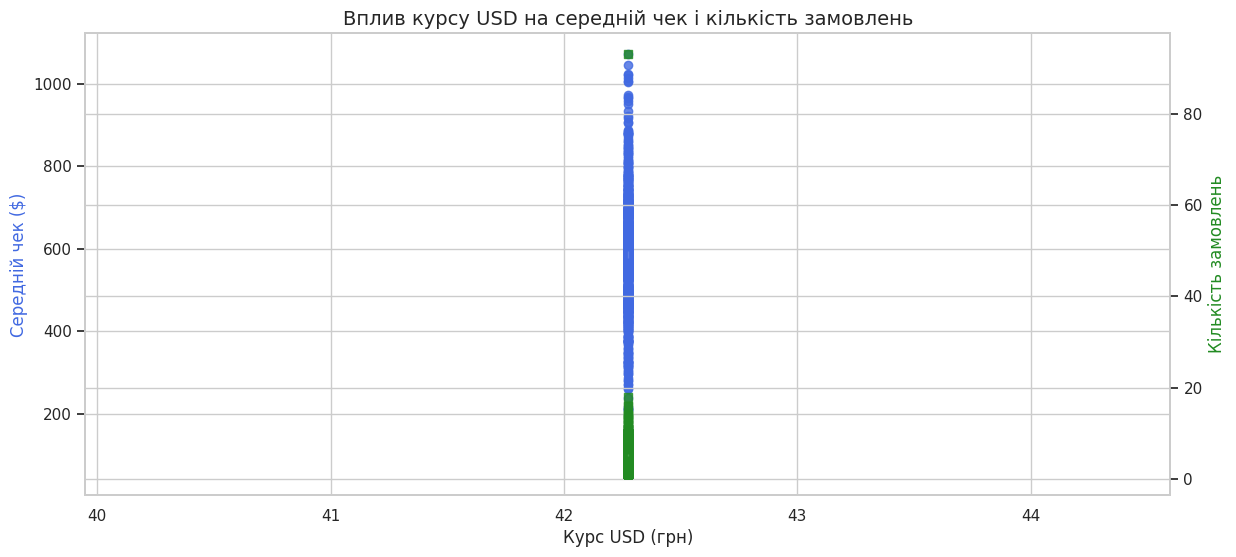

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

daily_stats = df_full.groupby('order_date').agg({
    'usd_amount': 'mean',
    'order_ID': 'nunique',
    'usd_rate': 'first'
}).reset_index()

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.regplot(
    data=daily_stats,
    x='usd_rate',
    y='usd_amount',
    scatter=True,
    ax=ax1,
    color='royalblue',
    marker='o',
    line_kws={'color': 'navy', 'label': 'Тренд середнього чека'}
)

ax2 = ax1.twinx()
sns.regplot(
    data=daily_stats,
    x='usd_rate',
    y='order_ID',
    scatter=True,
    ax=ax2,
    color='forestgreen',
    marker='s',
    line_kws={'color': 'darkgreen', 'label': 'Тренд кількості замовлень'}
)


ax1.set_xlabel('Курс USD (грн)', fontsize=12)
ax1.set_ylabel('Середній чек ($)', fontsize=12, color='royalblue')
ax2.set_ylabel('Кількість замовлень', fontsize=12, color='forestgreen')
plt.title('Вплив курсу USD на середній чек і кількість замовлень', fontsize=14)


Більшість точок зосереджені між 42–43 грн, тобто значних валютних стрибків у періоді спостереження не було. Це ускладнює виявлення сильного тренду — поведінка клієнтів не змінюється різко при незначних коливаннях курсу.
Сині точки (середній чек) показують легке зростання при підвищенні курсу USD. Це може свідчити про те, що:
- клієнти купують дорожчі товари, коли курс зростає (наприклад, імпортні позиції);
- або ціни в гривнях адаптуються до курсу, і чек у доларах виглядає стабільним.
Зелені квадрати (кількість замовлень) розташовані нерівномірно — немає очевидного тренду. Це може означати:
- поведінка клієнтів не чутлива до курсу в короткостроковій перспективі;
- або на кількість замовлень більше впливають інші фактори: сезонність, акції, канали залучення.

Можна змінювати ціни для імпортних товарів, але не очікувати різкого падіння попиту при незначному зростанні курсу.
Варто фокусуватись на сезонності, каналах і лояльності.

In [35]:
df_full['price'] = pd.to_numeric(df_full['price'], errors='coerce')
df_full['discount_percent'] = pd.to_numeric(df_full['discount_percent'], errors='coerce')
df_full['margin'] = df_full['price'] - df_full['price'] * df_full['discount_percent'] / 100
category_stats = df_full.groupby('category').agg({
    'margin': 'mean',
    'order_ID': 'nunique'
}).reset_index()

high_margin_low_sales = category_stats[
    (category_stats['margin'] > category_stats['margin'].median()) &
    (category_stats['order_ID'] < category_stats['order_ID'].median())
]
high_margin_low_sales

,category,margin,order_ID
0,дом,24742.073532,2277


Тобто, товари в категорії "дом" мають високу маржинальність — вони приносять багато прибутку з кожного продажу.
Ця категорія має високу маржу, але менше замовлень, ніж інші.
Це означає, що товари для дому продаються нечасто, але приносять великий прибуток.
Такі товари — ідеальні кандидати для активного просування: реклама, акції, email-кампанії.




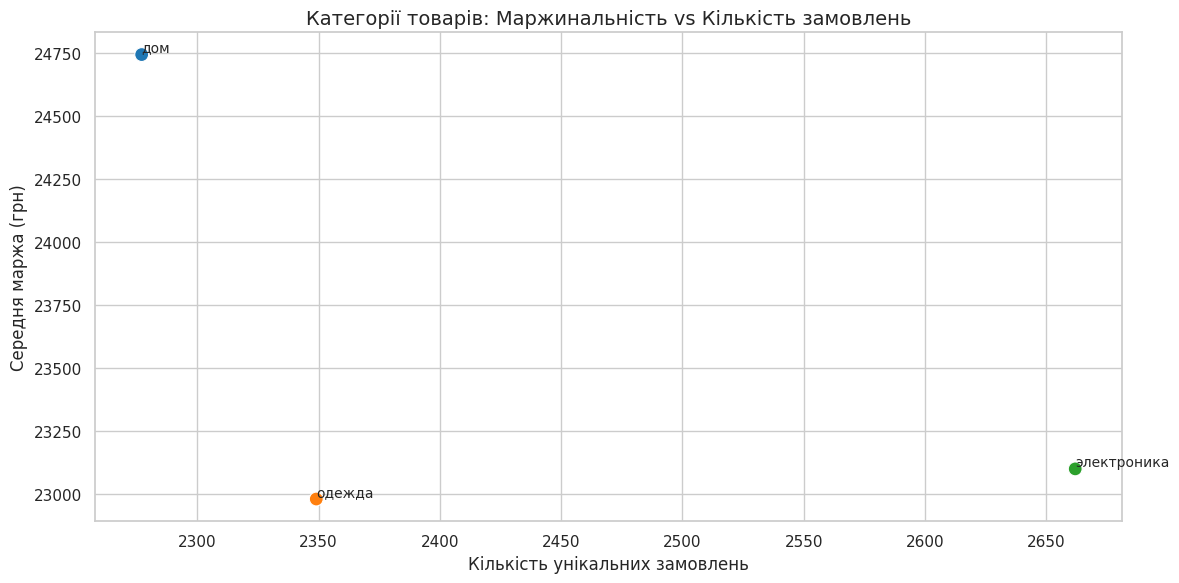

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

df_full['price'] = pd.to_numeric(df_full['price'], errors='coerce')
df_full['discount_percent'] = pd.to_numeric(df_full['discount_percent'], errors='coerce')
df_full['margin'] = df_full['price'] * (1 - df_full['discount_percent'] / 100)

category_stats = df_full.groupby('category').agg({
    'margin': 'mean',
    'order_ID': 'nunique'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=category_stats,
    x='order_ID',
    y='margin',
    hue='category',
    palette='tab10',
    s=100,
    legend=False
)

plt.title('Категорії товарів: Маржинальність vs Кількість замовлень', fontsize=14)
plt.xlabel('Кількість унікальних замовлень', fontsize=12)
plt.ylabel('Середня маржа (грн)', fontsize=12)
plt.grid(True)

for i in range(len(category_stats)):
    plt.text(
        category_stats['order_ID'][i],
        category_stats['margin'][i],
        category_stats['category'][i],
        fontsize=10,
        ha='left',
        va='bottom'
    )

plt.tight_layout()
plt.show()


Категорія "дім" - висока маржа,низький попит
Це означає, що товари для дому приносять найбільший прибуток з кожного продажу, але продаються нечасто.
Можна активізувати маркетинг — додати акції, змінити візуалізацію товарів, протестувати нові канали просування.
Категорія "одяг" - помірна маржа, середній попит.
Це збалансована категорія, яка має стабільний попит і непогану прибутковість.
Рекомендую підтримувати поточну стратегію, можливо, протестувати персоналізовані пропозиції для повторних покупців.
Категорія "електроніка" - найвищий попит, найнижча маржа.
Це найпопулярніша категорія, але з найнижчою прибутковістю.
Потрібно оптимізувати закупівельні ціни, переглянути знижки.


In [37]:
loyal_candidates = (
    df_full.groupby('customer_id')
    .agg({
        'order_amount': 'sum',
        'converted': 'mean',
        'order_ID': 'nunique'
    })
    .query('order_amount > 50000 and converted > 0.5 and order_ID > 2')
    .reset_index()
)
loyal_candidates

,customer_id,order_amount,converted,order_ID


In [38]:
# Групуємо по каналу: середній LTV
channel_ltv = df_full.groupby('channel').agg({
    'order_amount': 'sum',
    'customer_id': 'nunique'
}).reset_index()

channel_ltv['avg_LTV'] = channel_ltv['order_amount'] / channel_ltv['customer_id']
channel_ltv.sort_values(by='avg_LTV', ascending=False, inplace=True)

channel_ltv[['channel', 'avg_LTV']].head(10)

,channel,avg_LTV
2,organic,2.726858e+08
3,paid_search,2.545940e+08
1,email,2.102013e+08
4,referral,2.011775e+08
5,social,1.481819e+08
0,affiliate,9.657767e+07


- organic приносить найцінніших клієнтів — варто інвестувати в SEO, контент і бренд.
- paid_search теж ефективний, але потребує контролю ROI.
- Email — стабільний канал для утримання клієнтів, особливо в поєднанні з програмою лояльності.
- referral має потенціал — можна розширити бонуси за запрошення.
- social — менш ефективні для довгострокової цінності, але можуть працювати для акцій.
- affiliate — найнижчий LTV, варто провести аудит партнерів.
Можна провести глибший аналіз organic: які категорії вони купують, як часто повертаються.
Посилити email-маркетинг для сегментів з високим потенціалом.
Розширити referral програму з персоналізованими бонусами.
Оптимізувати витрати на affiliate — залишити лише ефективних партнерів.


/tmp/ipython-input-2657241493.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_ltv, x='avg_LTV', y='channel', palette='viridis')


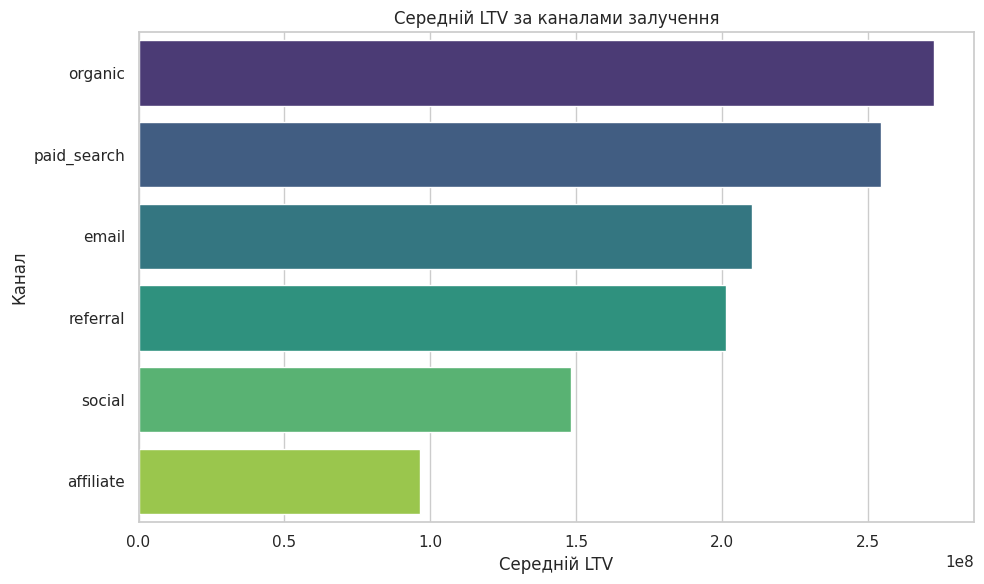

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

channel_ltv = df_full.groupby('channel').agg({
    'order_amount': 'sum',
    'customer_id': 'nunique'
}).reset_index()

channel_ltv['avg_LTV'] = channel_ltv['order_amount'] / channel_ltv['customer_id']

channel_ltv = channel_ltv.sort_values(by='avg_LTV', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=channel_ltv, x='avg_LTV', y='channel', palette='viridis')
plt.title('Середній LTV за каналами залучення')
plt.xlabel('Середній LTV')
plt.ylabel('Канал')
plt.tight_layout()
plt.show()

In [40]:
client_stats = df_full.groupby('customer_id').agg({
    'order_amount': 'sum',
    'order_ID': 'count',
    'order_date': ['min', 'max']
})

client_stats.columns = ['total_amount', 'total_orders', 'first_order', 'last_order']
client_stats = client_stats.reset_index()

client_stats['active_days'] = (client_stats['last_order'] - client_stats['first_order']).dt.days


In [42]:
today = client_stats['last_order'].max() + pd.Timedelta(days=1)

client_stats['recency'] = (today - client_stats['last_order']).dt.days

In [46]:
client_stats['R_score'] = pd.qcut(client_stats['recency'], 4, labels=[4,3,2,1])

client_stats['F_score'] = pd.qcut(client_stats['total_orders'], 4, labels=[1,2,3,4])

client_stats['M_score'] = pd.qcut(client_stats['total_amount'], 4, labels=[1,2,3,4])


In [44]:
def segment_rfm(row):
    r, f, m = int(row['R_score']), int(row['F_score']), int(row['M_score'])
    score = f"{r}{f}{m}"

    if score == "444":
        return "Champions"
    elif r >= 3 and f >= 3:
        return "Loyal Customers"
    elif r >= 3 and m >= 3:
        return "Big Spenders"
    elif f >= 3:
        return "Frequent Buyers"
    elif r == 4:
        return "Recent Customers"
    elif r <= 2 and f <= 2 and m <= 2:
        return "At Risk"
    else:
        return "Others"

client_stats['Segment'] = client_stats.apply(segment_rfm, axis=1)


In [45]:
segment_summary = client_stats.groupby('Segment').agg({
    'customer_id': 'count',
    'total_amount': 'mean',
    'total_orders': 'mean',
    'recency': 'mean'
}).reset_index()

segment_summary


,Segment,customer_id,total_amount,total_orders,recency
0,At Risk,145,4.723935e+06,80.400000,581.200000
1,Big Spenders,5,1.410389e+07,124.800000,163.600000
2,Champions,82,9.376765e+08,14108.829268,38.292683
3,Frequent Buyers,65,2.027539e+07,326.246154,370.969231
4,Loyal Customers,76,2.525737e+08,3829.407895,131.697368
5,Others,64,8.737963e+06,114.984375,237.890625
6,Recent Customers,13,4.371505e+06,81.000000,58.461538


Кого варто запросити з клієнтів в програму лояльності:
- Loyal Customers (76 клієнтів).Вони вже часто купують і нещодавно були активні. Програма лояльності допоможе утримати їх і збільшити середній чек.
- Frequent Buyers (65 клієнтів).Висока частота покупок, але трохи знижується активність. Програма може повернути їх до регулярних покупок.
- Big Spenders (5 клієнтів).Високі витрати, але не надто часті покупки. Програма може стимулювати їх купувати частіше.


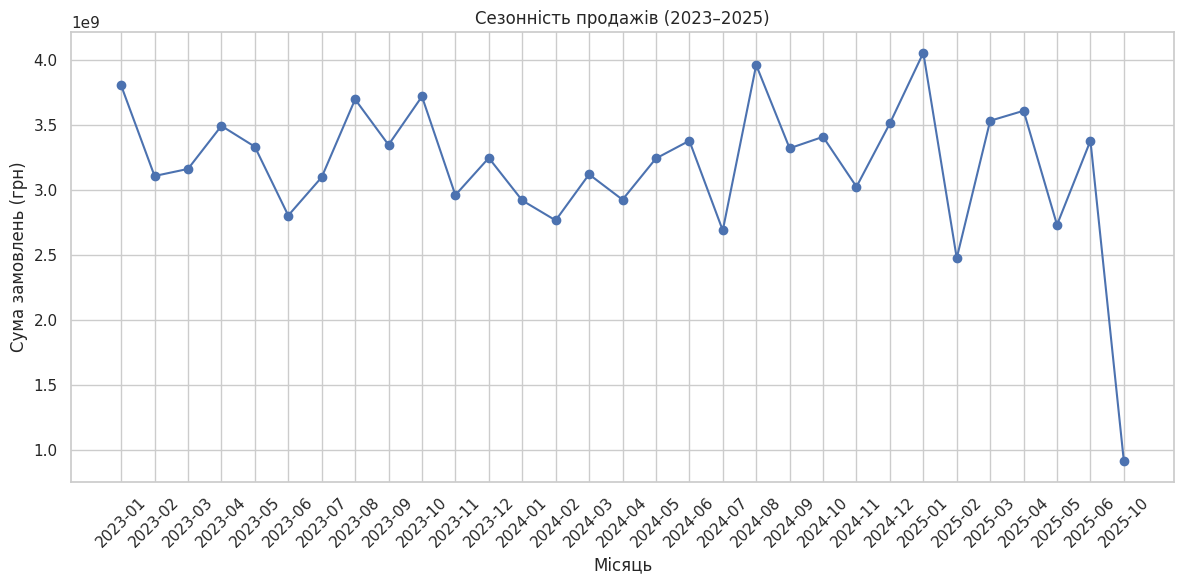

In [47]:
# Сезонність продажів
df_full['month'] = df_full['order_date'].dt.to_period('M')
seasonality = df_full.groupby('month')['order_amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(seasonality['month'].astype(str), seasonality['order_amount'], marker='o')
plt.title('Сезонність продажів (2023–2025)')
plt.xlabel('Місяць')
plt.ylabel('Сума замовлень (грн)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



Пікові прожажі : літо 2023року (помітний сплеск, ймовірно пов’язаний з сезонними товарами (одяг, товари для дому, відпускні покупки)) та початок 2024року(ще один виражений пік, можливо, післяноворічні розпродажі або зимові колекції).
Різке падіння: вересень 2025року.Це може бути наслідком:
- завершення акційного періоду,
- зміни в маркетинговій активності,
- або зовнішніх економічних факторів (наприклад, коливання курсу, зміни в поведінці споживачів).
Щороку спостерігається хвилеподібна динаміка — зростання навесні/влітку, спад восени, потім новий підйом взимку.
Рекомендовано збільшувати запаси перед піковими місяцями;
запускати кампанії до сезонного підйому, особливо влітку та на початку року.

In [48]:
df_full['order_date'] = pd.to_datetime(df_full['order_date'])
daily_sales = df_full.set_index('order_date').resample('D')['order_amount'].sum()

In [49]:
smoothed_sales = daily_sales.rolling(window=30, center=True).mean()

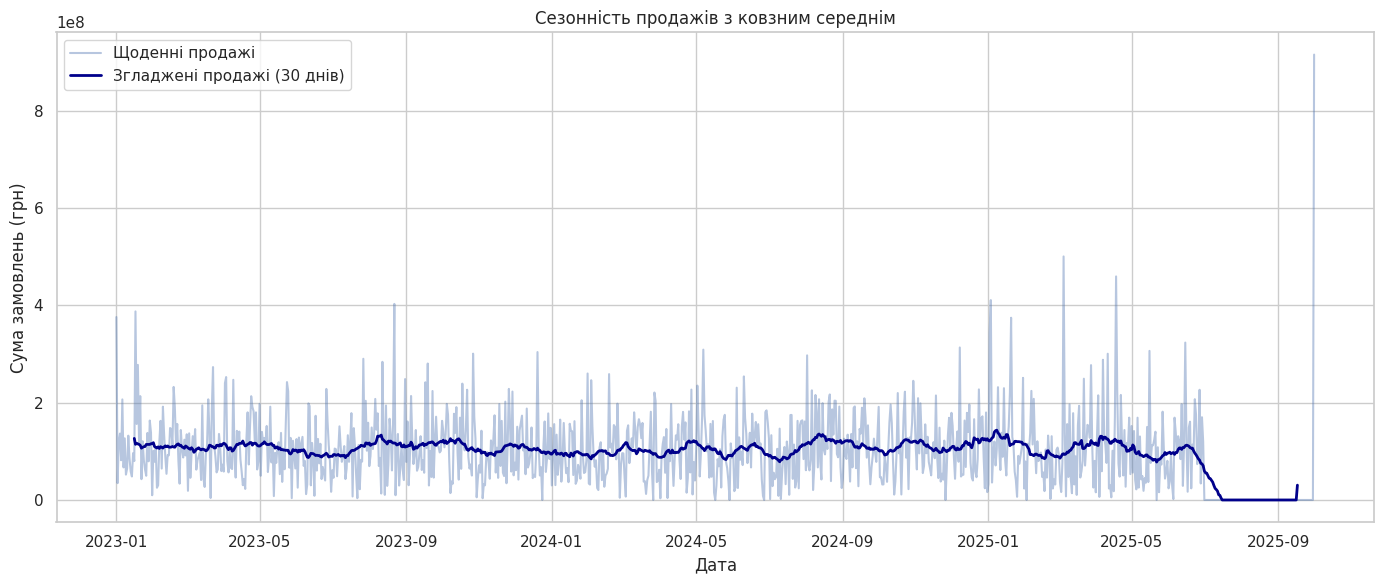

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_sales, label='Щоденні продажі', alpha=0.4)
plt.plot(smoothed_sales, label='Згладжені продажі (30 днів)', color='darkblue', linewidth=2)

plt.title('Сезонність продажів з ковзним середнім')
plt.xlabel('Дата')
plt.ylabel('Сума замовлень (грн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Щоденні продажі — нестабільні, з високою варіативністю
Світло-блакитна лінія демонструє, що обсяги замовлень змінюються день у день — є багато піків і спадів, що можуть бути спричинені:
- акціями, розпродажами;
- вихідними та святами;
- зовнішніми факторами (курс валют, погода, новини).
Згладжена лінія (30-денне середнє) — виявляє сезонні хвилі
Темно-синя лінія показує загальну тенденцію без шуму. Вона дозволяє побачити:
- Періоди зростання: весна–літо 2023, зима 2024, весна 2025 — ймовірно, це пікові сезони для покупок.
- Періоди спаду: осінь 2023, літо 2024, вересень 2025 — можливо, періоди низької активності або завершення акцій.


**Висновки:**
- Зростання курсу USD - зниження кількості замовлень.
- organic трафік - найвищий LTV
- Категорія «дом» - висока маржа, але низький попит
- Варто запросити в програму лояльності:
Loyal Customers (76 клієнтів).Вони вже часто купують і нещодавно були активні.
Frequent Buyers (65 клієнтів).Висока частота покупок, але трохи знижується активність. Програма може повернути їх до регулярних покупок.
Big Spenders (5 клієнтів).Високі витрати, але не надто часті покупки. Програма може стимулювати їх купувати частіше.
- Осінь - спад продажів, потреба в активації.

**Рекомендації:**
- Ціни на імпортні товари можна коригувати під курс, не очікуючи різкого падіння замовлень (при невеликих змінах).
- Активізувати email-кампанії для VIP і неактивних клієнтів
- Просувати категорії з високою маржею, але низьким попитом
- Запускати акції перед сезонними спадами
- Запросити клієнтів із високим LTV, частими покупками та довгою історією
- Створити рівні програми лояльності: Silver — для Frequent Buyers; Gold — для Loyal Customers; Platinum — для Big Spenders. Додати персоналізовані бонуси: кешбек, подарунки, ранній доступ до акцій.
- Додати бонуси для нових клієнтів з потенціалом.
